In [9]:
#Importeer de module networkx
import networkx as nx
import networkx.drawing
#Importeer de module matplotlib.pyplot
import matplotlib.pyplot as plt

#standard support
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

#custom module
from Simulation import *

In [2]:
#the network stored in .py module
from network_data import *

In [3]:
#list of names (fake)
names_list



['Agatha Chaudhry',
 'Jacquelyn Mcneely',
 'Les Alter',
 'Candyce Mercure',
 'Bret Janis',
 'Olive Horst',
 'Lucien Macedo',
 'Nam Greenspan',
 'Kimberli Kleiner',
 'Lilliana Dona',
 'Shakia Valvo',
 'Isela Mennella',
 'Hiedi Guilbert',
 'Glynda Vaccaro',
 'Ardelia Gelb',
 'Allan Godbee',
 'Erline Varughese',
 'Genie Shiner',
 'Keitha Ferrari',
 'Luci Ro',
 'Emelda Trivedi',
 'Gidget Reames',
 'Lashaun Hipple',
 'Becki Neblett',
 'Trey Mullarkey',
 'Aletha Moak',
 'Thea Cutter',
 'Emile Gustafson',
 'Lonny Beaudin',
 'Alisa Loiselle',
 'Tamiko Waldroup',
 'Karan Legaspi',
 'Dimple Hippe',
 'Jettie Goodlow',
 'Franchesca Kibler',
 'Kristine Sumner',
 'Shera Vero',
 'Rosanne Winkfield',
 'Angelina Fiorillo',
 'Vernia Overbay',
 'Forest Butter',
 'Corine Gately',
 'Twanna Abercrombie',
 'Bessie Natoli',
 'Pamala Zuber',
 'Madison Gilstrap',
 'Alleen Gerken',
 'Collen Lindsley',
 'Kizzy Cobey',
 'Marla Hotaling',
 'Bryant Strawder',
 'Janette Seyler',
 'Delicia Vosburg',
 'Mila Kitch',
 'R

In [4]:
#create network
M = nx.Graph()
M.add_edges_from(edges)

# Simulation with a lot of runs

transmission-probability: 0.5, populationsize: 130
11.96 5.26824448939
11.96 5.26824448939


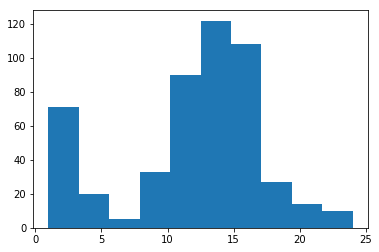

In [6]:
sim = Simulation(0.5, M)
nrRuns = 500

total_infected = np.zeros(nrRuns)
timesteps = np.zeros(nrRuns)

for i in range(nrRuns):
    simRes = sim.simulate(verbose=False)
    total_infected[i], timesteps[i] = len(simRes.getRecoveredDevelopment()), simRes.getTotalTimesteps()
    
print(np.mean(total_infected), np.std(total_infected))
print(np.mean(timesteps), np.std(timesteps))

plt.hist(timesteps)
plt.show()

# Make gif 

transmission-probability: 0.5, populationsize: 130
not-infected: 20, recovered: 110, timesteps: 14


<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

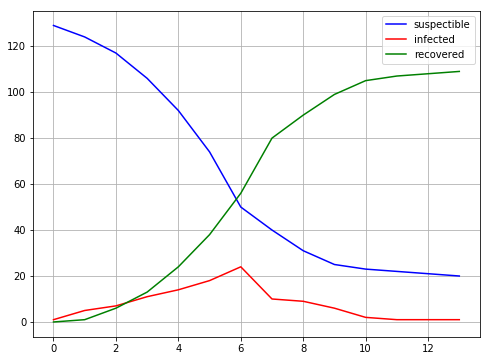

In [10]:
sim = Simulation(0.5, M)

simres = sim.simulate(verbose=True, makeGIF=True);
simres.makeGIF("gif1.gif");
    
#also prints plot of this run

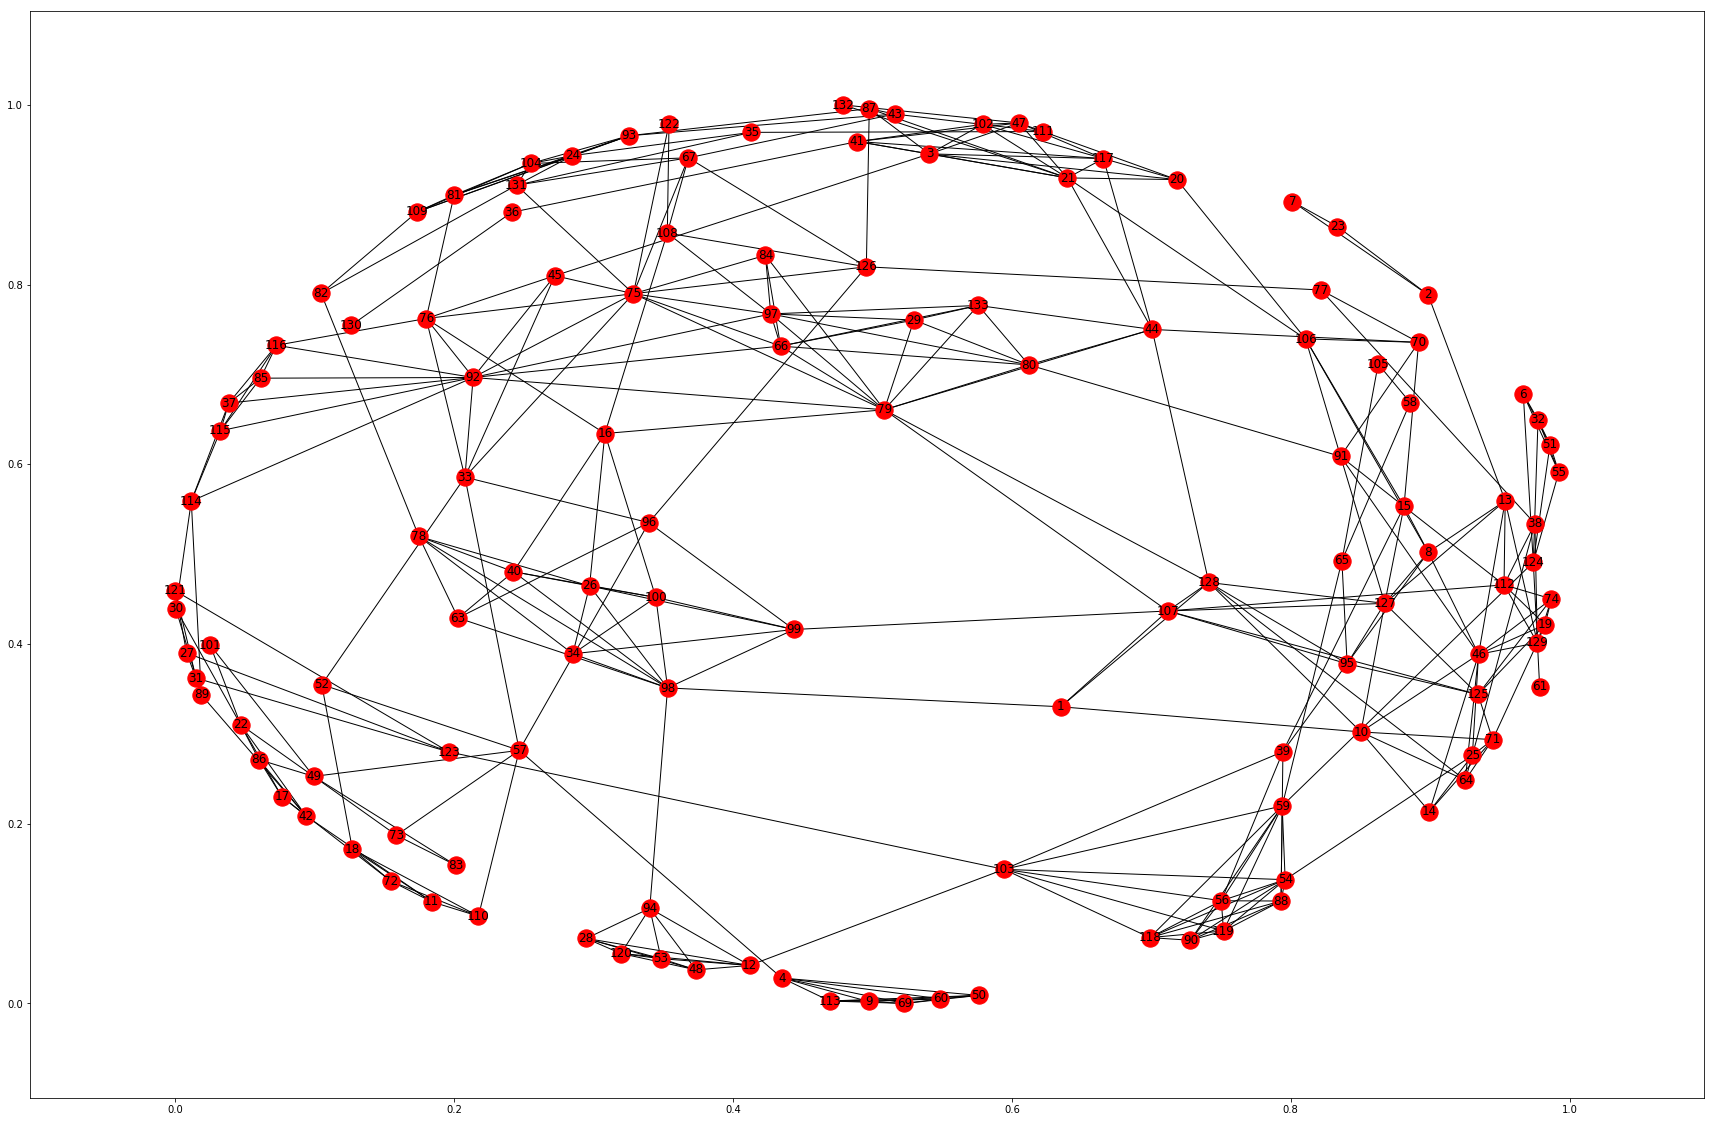

In [11]:
plt.figure(figsize=(30,20))

nx.draw_networkx(M, with_labels = True)
plt.show()

# Chance of Infection per Person

In [14]:
sim = Simulation(0.5, M)
nrRuns = 100

total_infected = np.zeros(nrRuns)
affectedCounter = {k : 0 for k in range(1, len(names_list)+1)}
timesteps = np.zeros(nrRuns)

for i in range(nrRuns):
    simRes = sim.simulate(verbose=False)
    for k in simRes.affected:
        affectedCounter[k] += 1
    
sorted_outcome = sorted(affectedCounter.values())

print("5 with lowest chance of infection")
lowest = []
for x in sorted_outcome[0:5]:
    for key, value in affectedCounter.items():
            if value == x and not key in lowest:
                print("{}: prob: {}%".format(names_list[key-1], 100*(value/nrRuns)))
                lowest.append(key)
            if len(lowest) > 5:
                break
    
    
print("----------------------------")
print("5 highest chance of infection")
highest = []
for x in sorted_outcome[-4:-1]:
    for key, value in affectedCounter.items():
            if value == x and not key in highest:
                print("{}: prob: {}%".format(names_list[key-1], 100*(value/nrRuns)))
                highest.append(key)
            if len(highest) > 5:
                break


transmission-probability: 0.5, populationsize: 130
5 with lowest chance of infection
Bret Janis: prob: 0.0%
Vernetta Perret: prob: 0.0%
Kiersten Triano: prob: 0.0%
Loren Haman: prob: 12.0%
Dora Loll: prob: 14.000000000000002%
----------------------------
5 highest chance of infection
Bessie Natoli: prob: 74.0%
Pamala Zuber: prob: 74.0%
Guadalupe Mikus: prob: 74.0%
Wilfredo Clare: prob: 74.0%
Frances Stoneman: prob: 74.0%
Fritz Corrigan: prob: 74.0%


# Correlation # of edges and chance of infection